# NAEC - Notebook to check challenge data statistic

In [2]:
import matplotlib.pyplot  as plt
from os import path
import logging
import random, os
import scipy.io.wavfile as wav
import tensorflow as tf
import tensorflow_io as tfio

In [3]:
CUR_PATH = os.getcwd()
DATA_PATH_PREFIX = CUR_PATH + "/../data/AEC-Challenge/datasets/"
DATA_PATHS = [DATA_PATH_PREFIX + "real", DATA_PATH_PREFIX + "real_doubled", DATA_PATH_PREFIX + "synthetic/echo_signal", DATA_PATH_PREFIX + "synthetic/farend_speech"]

### Check if data directories exists

In [4]:
for path_ in DATA_PATHS:
    if(not path.exists(path_)):
        logging.error("%s is not existing!", path_)
        raise Exception()

In [5]:
def CheckAudioLen(filename):
    (source_rate, source_sig) = wav.read(filename)
    duration_seconds = len(source_sig) / float(source_rate)
    return duration_seconds

In [6]:
audio_lengts = []
for path_ in DATA_PATHS:
    filenames = random.sample(os.listdir(path_), 100)
    for filename in filenames:
        filepath = os.path.join(path_, filename)
        audio_lengts.append(CheckAudioLen(filepath))

In [7]:
lengts = list(dict.fromkeys(sorted(audio_lengts)))
counts = []
for l in lengts:
    counts.append(audio_lengts.count(l))

### Display bar chart of audio files lenghts

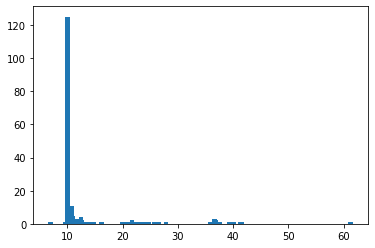

In [8]:
plt.bar(lengts, counts)
plt.show()

In [19]:
for path_ in DATA_PATHS:
    filenames = random.sample(os.listdir(path_), 2)
    for filename in filenames:
        filepath = os.path.join(path_, filename)
        audio = tfio.audio.AudioIOTensor(filepath)
        audio_slice = audio[1024:]
        audio_tensor = tf.squeeze(audio_slice, axis=[-1])
        tensor = tf.cast(audio_tensor, tf.float32) / 32768.0
        position = tfio.audio.trim(tensor, axis=0, epsilon=0.1)
        start = position[0]
        stop = position[1]
        processed = tensor[start:stop]
        fade = tfio.audio.fade(
            processed, fade_in=1000, fade_out=2000, mode="logarithmic")
        spectrogram = tfio.audio.spectrogram(
            fade, nfft=512, window=512, stride=256)

        plt.figure()
        spec = tf.math.log(spectrogram).numpy().transpose()
        plt.imshow(spec)
        plt.title(filename)
        print(spec.shape)

SyntaxError: keyword argument repeated (Temp/ipykernel_10452/660282207.py, line 16)